# Predicting House Prices

Description:
    

>Ask a home buyer to describe their dream house, and they probably won't begin with the 
height of the basement ceiling or the proximity to an east-west railroad. But this playground 
competition's dataset proves that much more influences price negotiations than the number of bedrooms 
or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential 
homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

link to competition >>>>>> https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## Evalation:

> Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the 
logarithm of the predicted value and the logarithm of the observed sales 
price. (Taking logs means that errors in predicting expensive houses and 
cheap houses will affect the result equally.)

# File Descriptions:


>
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean 
  De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year 
  and month of sale, lot square footage, and number of bedrooms


In [1]:
# Import Basic Tools For Now
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load Data
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df.shape, df_test.shape

((1460, 81), (1459, 80))

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

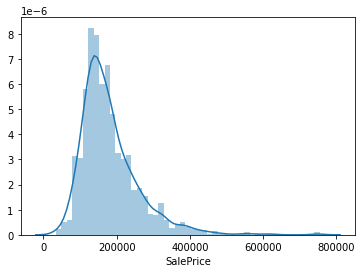

In [4]:
sns.distplot(df["SalePrice"]);

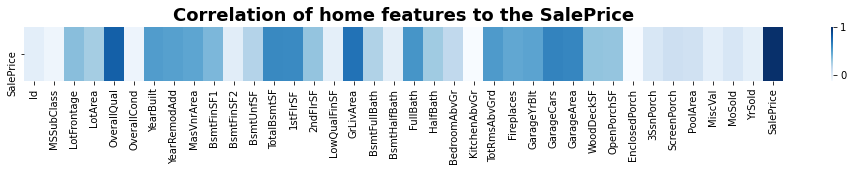

In [5]:
number = df.select_dtypes(exclude="object")
numcorr = number.corr()
f, ax = plt.subplots(figsize=(17, 1))
sns.heatmap(numcorr.sort_values(by=["SalePrice"], ascending=False).head(1), cmap="Blues"),

plt.title("Correlation of home features to the SalePrice", weight="bold", fontsize=18);
plt.show();

            


In [6]:
number2 = numcorr["SalePrice"].sort_values(ascending=False).head(10).to_frame()


cm = sns.light_palette("cyan", as_cmap=True)

sale_corr_list = number2.style.background_gradient(cmap=cm)
sale_corr_list


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


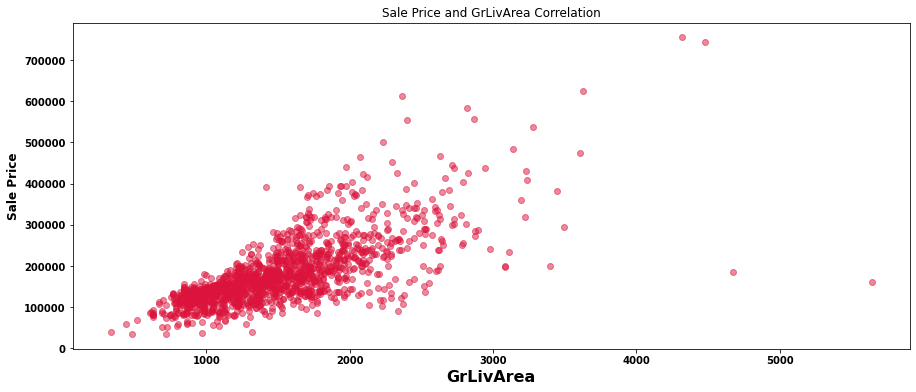

In [7]:
plt.figure(figsize=(15, 6))
plt.scatter(x=df["GrLivArea"], y=df["SalePrice"], color="crimson", alpha=0.5)
plt.title("Sale Price and GrLivArea Correlation")
plt.xlabel("GrLivArea", weight="bold", fontsize=16)
plt.ylabel("Sale Price", weight="bold", fontsize=12)
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show()

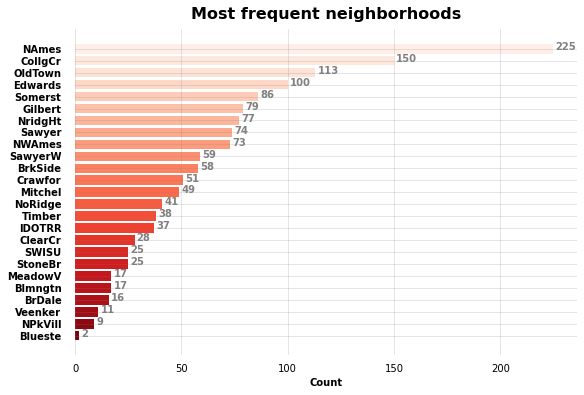

In [8]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))


# Horizontal Bar Plot
title_cnt = df.Neighborhood.value_counts().sort_values(ascending=False).reset_index()
mn = ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1] , color=sns.color_palette("Reds", len(title_cnt)))


# Remove axis splines
for s in ["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)
    
    
# Remove x and y ticks
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")


# add padding between axis and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# add x and y gridlines
ax.grid(b=True, color="grey", linestyle="-", linewidth=1, alpha=0.2)

# Show top values
ax.invert_yaxis()


# Add plot title

ax.set_title("Most frequent neighborhoods", weight="bold",
             loc="center", pad=10, fontsize=16)


ax.set_xlabel("Count", weight="bold")



# Add anotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight="bold", color="grey")
    

plt.yticks(weight="bold")
plt.show()
#Show Plot
plt.show();



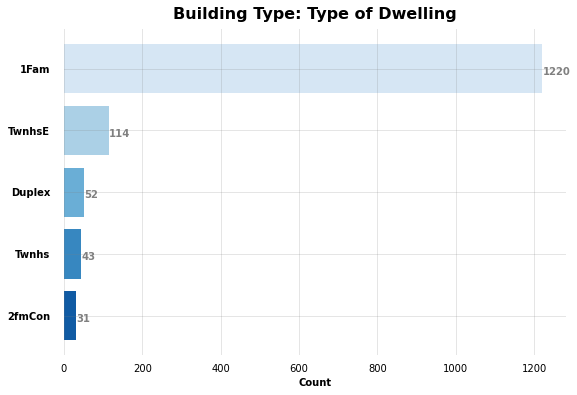

In [9]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))


# Horizontal Bar Plot
title_cnt = df.BldgType.value_counts().sort_values(ascending=False).reset_index()
mn = ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1] , color=sns.color_palette("Blues", len(title_cnt)))


# Remove axis splines
for s in ["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)
    
    
# Remove x and y ticks
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")


# add padding between axis and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# add x and y gridlines
ax.grid(b=True, color="grey", linestyle="-", linewidth=1, alpha=0.2)

# Show top values
ax.invert_yaxis()


# Add plot title

ax.set_title("Building Type: Type of Dwelling", weight="bold",
             loc="center", pad=10, fontsize=16)


ax.set_xlabel("Count", weight="bold")



# Add anotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight="bold", color="grey")
    

plt.yticks(weight="bold")
plt.show()
#Show Plot
plt.show();




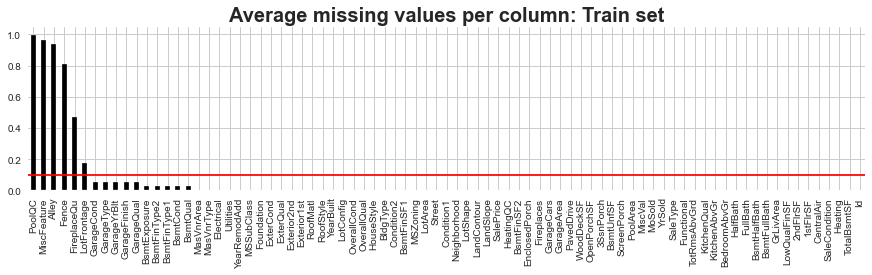

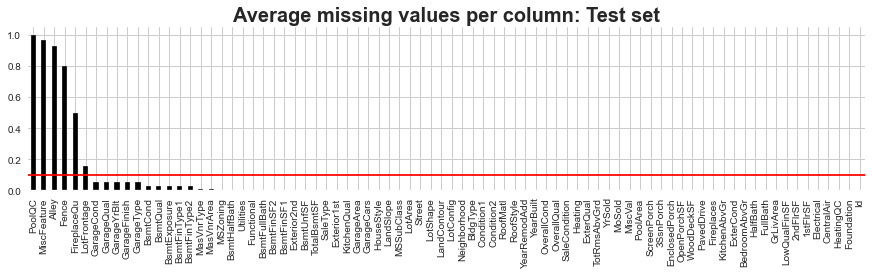

In [10]:
## Drop all columns with more than 90% missing values
plt.style.use("seaborn")
sns.set_style("whitegrid")

plt.subplots(0,0,figsize=(15,3))


df.isnull().mean().sort_values(ascending=False).plot.bar(color="black")
plt.axhline(y=0.1, color="r", linestyle="-")
plt.title("Average missing values per column: Train set", fontsize=20, weight="bold")
plt.show()


plt.subplots(1,0,figsize=(15,3))
df_test.isnull().mean().sort_values(ascending=False).plot.bar(color="black")
plt.axhline(y=0.1, color="r", linestyle="-")
plt.title("Average missing values per column: Test set", fontsize=20, weight="bold")
plt.show()





In [11]:
df = df.dropna(thresh=len(df)*0.9, axis=1)
df_test = df_test.dropna(thresh=len(df_test)*0.9, axis=1)

X = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]


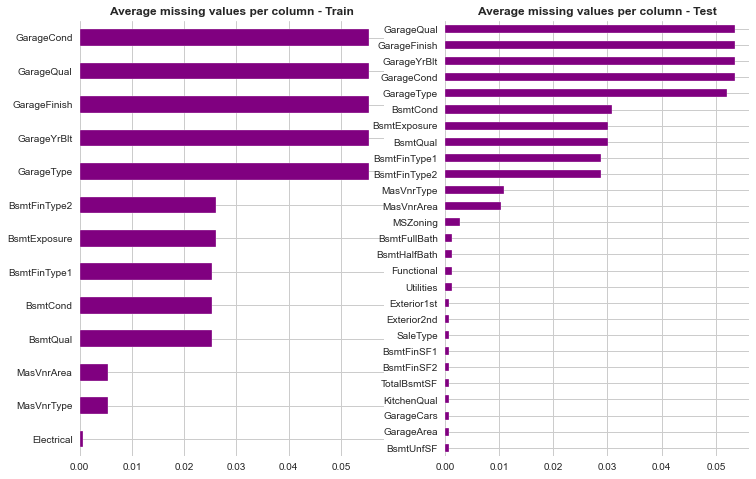

In [12]:

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,2),(0,0))
allna = (df.isnull().sum()/ len(df))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=True)
allna.plot.barh(color="purple")
plt.title("Average missing values per column - Train", fontsize=12, weight="bold")
plt.subplots_adjust(right=0.9)


ax1 = plt.subplot2grid((1,2),(0,1))
allna_test = (df_test.isnull().sum()/ len(df_test))
allna_test = allna_test.drop(allna_test[allna_test == 0].index).sort_values(ascending=True)
allna_test.plot.barh(color="purple")
plt.title("Average missing values per column - Test", fontsize=12, weight="bold");


In [13]:
print("The shape of the new dataframe after dropping columns with more than 90% M.V is", df.shape)
print("The shape of the new dataframe after dropping columns with more than 90% M.V is", df_test.shape)

The shape of the new dataframe after dropping columns with more than 90% M.V is (1460, 75)
The shape of the new dataframe after dropping columns with more than 90% M.V is (1459, 74)


In [14]:
NA = df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1',
      'BsmtCond', 'BsmtQual','BsmtExposure', 
      'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath',
      'Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF',
      'GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]


NA = df_test[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1',
      'BsmtCond', 'BsmtQual','BsmtExposure', 
      'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath',
      'Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF',
      'GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]

In [15]:
NAcat = NA.select_dtypes(include="object")
NAnum = NA.select_dtypes(exclude="object")

print("We have:", NAcat.shape[1], "categorical features with missing values")
print("We have:", NAnum.shape[1], "numerical features with missing values")

We have: 18 categorical features with missing values
We have: 10 numerical features with missing values


In [16]:
NAnum.head()

,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,1961.0,0.0,0.0,0.0,270.0,882.0,730.0,1.0,144.0,468.0
1,1958.0,108.0,0.0,0.0,406.0,1329.0,312.0,1.0,0.0,923.0
2,1997.0,0.0,0.0,0.0,137.0,928.0,482.0,2.0,0.0,791.0
3,1998.0,20.0,0.0,0.0,324.0,926.0,470.0,2.0,0.0,602.0
4,1992.0,0.0,0.0,0.0,1017.0,1280.0,506.0,2.0,0.0,263.0


In [17]:
#MasVnrArea: Masonry veneer area in square feet, 
#the missing data means no veneer so we fill with 0

df['MasVnrArea'] = df.MasVnrArea.fillna(0)

#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
df["GarageYrBlt"] = df.GarageYrBlt.fillna(1980)

# Fill the rest of the num categories with 0 because if their 0, it means the house
# doesn't have)




#MasVnrArea: Masonry veneer area in square feet, 
#the missing data means no veneer so we fill with 0

df_test['MasVnrArea'] = df_test.MasVnrArea.fillna(0)

#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
df_test["GarageYrBlt"] = df_test.GarageYrBlt.fillna(1980)

# Fill the rest of the num categories with 0 because if their 0, it means the house
# doesn't have)


In [18]:
NAcat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,Unf,TA,TA,LwQ,Rec,TA,TA,No,None,SBrkr,RH,AllPub,Typ,VinylSd,VinylSd,TA,WD
1,Attchd,Unf,TA,TA,Unf,ALQ,TA,TA,No,BrkFace,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Sdng,Gd,WD
2,Attchd,Fin,TA,TA,Unf,GLQ,TA,Gd,No,None,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,TA,WD
3,Attchd,Fin,TA,TA,Unf,GLQ,TA,TA,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
4,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,No,None,SBrkr,RL,AllPub,Typ,HdBoard,HdBoard,Gd,WD


In [19]:
NAcat1 = NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1



,Electrical,SaleType,Exterior2nd,Exterior1st,KitchenQual,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtQual,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,0,1,1,1,1,2,2,4,16,42,42,44,44,45,76,78,78,78


In [20]:
#We start with features having just few missing value:  We fill the gap with forward fill method:
df['Electrical'].fillna(method='ffill', inplace=True)
df['SaleType'].fillna(method='ffill', inplace=True)
df['KitchenQual'].fillna(method='ffill', inplace=True)
df['Exterior1st'].fillna(method='ffill', inplace=True)
df['Exterior2nd'].fillna(method='ffill', inplace=True)
df['Functional'].fillna(method='ffill', inplace=True)
df['Utilities'].fillna(method='ffill', inplace=True)
df['MSZoning'].fillna(method='ffill', inplace=True)



df_test['Electrical'].fillna(method='ffill', inplace=True)
df_test['SaleType'].fillna(method='ffill', inplace=True)
df_test['KitchenQual'].fillna(method='ffill', inplace=True)
df_test['Exterior1st'].fillna(method='ffill', inplace=True)
df_test['Exterior2nd'].fillna(method='ffill', inplace=True)
df_test['Functional'].fillna(method='ffill', inplace=True)
df_test['Utilities'].fillna(method='ffill', inplace=True)
df_test['MSZoning'].fillna(method='ffill', inplace=True)

In [21]:
#Categorical missing values
NAcols=df.columns[:74]
for col in NAcols:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("None")
    if df_test[col].dtype == "object":
        df_test[col] = df_test[col].fillna("None")
        
        

#Numerical missing values
for col in NAcols:
    if df[col].dtype != "object":
        df[col]= df[col].fillna(0)
    if df_test[col].dtype != "object":
        df_test[col]= df_test[col].fillna(0)
        
        


In [22]:
df.isnull().sum().sort_values(ascending=False).head()

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
dtype: int64

In [23]:

df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] +df['GarageArea']

df['Bathrooms'] = df['FullBath'] + df['HalfBath']*0.5 

df['Year average']= (df['YearRemodAdd']+df['YearBuilt'])/2


df_test['TotalArea'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['GrLivArea'] +df_test['GarageArea']

df_test['Bathrooms'] = df_test['FullBath'] + df_test['HalfBath']*0.5 

df_test['Year average']= (df_test['YearRemodAdd']+df_test['YearBuilt'])/2

In [24]:
# df["MoSold"] = df["MoSold"].astype(str)
# df["MSSubClass"] = df["MSSubClass"].apply(str)
# df["YrSold"] = df["YrSold"].astype(str)


# df_test["MoSold"] = df_test["MoSold"].astype(str)
# df_test["MSSubClass"] = df_test["MSSubClass"].apply(str)
# df_test["YrSold"] = df_test["YrSold"].astype(str)



## One Hot Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df[df.columns[:]].apply(le.fit_transform)
df_test_encoded = df_test[df_test.columns[:]].apply(le.fit_transform)

# df_encoded = pd.get_dummies(df)
# df_test_encoded = pd.get_dummies(df_test)
print("The shape of the original training set is", df.shape)
print("The shape of the encoded training set is", df_encoded.shape)
print("We created", df_encoded.shape[1] - df.shape[1], "new encoded features ")

print("The shape of the original test set is", df_test.shape)
print("The shape of the encoded test set is", df_test_encoded.shape)
print("We created", df_encoded.shape[1] - df_test.shape[1], "new encoded features ")

The shape of the original training set is (1460, 78)
The shape of the encoded training set is (1460, 78)
We created 0 new encoded features 
The shape of the original test set is (1459, 77)
The shape of the encoded test set is (1459, 77)
We created 1 new encoded features 


In [26]:
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

In [27]:
df.select_dtypes(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


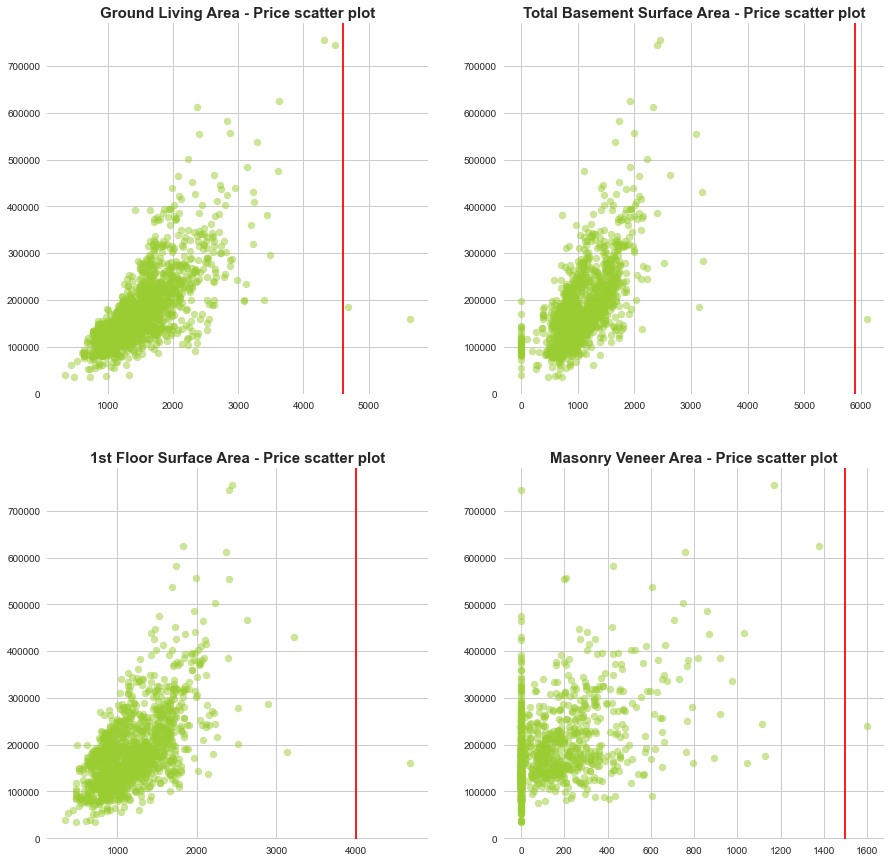

In [28]:
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2,2), (0,0))
plt.scatter(x=df.GrLivArea, y=df.SalePrice, color=("yellowgreen"), alpha=0.5)
plt.axvline(x=4600, color="r", linestyle="-")
plt.title("Ground Living Area - Price scatter plot", fontsize=15, weight="bold")

ax1 = plt.subplot2grid((2,2), (0,1))
plt.scatter(x=df.TotalBsmtSF, y=df.SalePrice, color=("yellowgreen"), alpha=0.5)
plt.axvline(x=5900, color="r", linestyle="-")
plt.title("Total Basement Surface Area - Price scatter plot", fontsize=15, weight="bold")

ax1 = plt.subplot2grid((2,2), (1,0))
plt.scatter(x=df['1stFlrSF'], y=df.SalePrice, color=("yellowgreen"), alpha=0.5)
plt.axvline(x=4000, color="r", linestyle="-")
plt.title("1st Floor Surface Area - Price scatter plot", fontsize=15, weight="bold")

ax1 = plt.subplot2grid((2,2), (1,1))
plt.scatter(x=df['MasVnrArea'], y=df.SalePrice, color=("yellowgreen"), alpha=0.5)
plt.axvline(x=1500, color="r", linestyle="-")
plt.title("Masonry Veneer Area - Price scatter plot", fontsize=15, weight="bold");

## Machine Learning

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 77), (292, 77), (1168,), (292,))

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error


rfg = RandomForestRegressor()
param_grid = {"n_estimators": range(1,20,2),
              "max_depth": range(1,5, 1),
              "max_features": range(1,5, 1)}

rfg_reg = RandomizedSearchCV(rfg, param_distributions=param_grid, n_iter=20,
                            cv=5)


rfg_reg.fit(X_train, y_train)
print("The best Alpha is:", rfg_reg.best_params_)


The best Alpha is: {'n_estimators': 11, 'max_features': 4, 'max_depth': 4}


In [31]:
rfg_mod = RandomForestRegressor(n_estimators=19, max_features=4, max_depth=4)
rfg_mod.fit(X_train, y_train)
y_pred_rfg = rfg_mod.predict(X_test)






print("Root Mean Squared Error train =", str(math.sqrt
                            (mean_squared_error(y_test, y_pred_rfg))))


Root Mean Squared Error train = 78.0795136265651


In [32]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=4,
                                    max_features=10,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)
ideal_model.score(X_test, y_test)


0.8997970418852147

In [48]:
#Final Predict

final_pred = ideal_model.predict(X_test)


In [50]:


final_submission = pd.DataFrame({
                "Id": y_test.index,
                "Actual Sale Price": y_test,
                "SalePrice_Pred": final_pred.round(0)
})


final_submission.to_csv("final_submission.csv", index=False)

final_submission.head()


,Id,Actual Sale Price,SalePrice_Pred
1258,1258,368,320.0
1041,1041,307,299.0
1181,1181,630,526.0
1108,1108,337,324.0
554,554,553,502.0
